Import des librairies

In [62]:
from matplotlib import pyplot as plt
import numpy as np
import random

Fonction permettant de dessiner les courbes de niveaux d'une fonction de 2 variables

In [63]:
def show_2d_function(fct, min_val=-5, max_val=5, mesh_step=.01, optimal=None, bar=True, ax=None, **kwargs):
    x1_min, x2_min = np.ones(2) * min_val
    x1_max, x2_max = np.ones(2) * max_val
    x1_values = np.arange(x1_min, x1_max+mesh_step, mesh_step)
    x2_values = np.arange(x2_min, x2_max+mesh_step, mesh_step)
    fct_values = np.array([[fct(x1,x2) for x1 in x1_values] for x2 in x2_values])
    #set_current_axes(ax)
    if 'cmap' not in kwargs: kwargs['cmap'] = 'RdBu'
    plt.contour(x1_values, x2_values, fct_values, 40, **kwargs)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    if bar:
        plt.colorbar()
    if optimal is not None: 
        plt.scatter(*optimal, s=200, marker='*', c='r')



Fonction permettant de dessiner la trajectoire de l'algorithme

In [ ]:
# w_list sous la forme d'une liste  coordonnées [[w00,b0],[w01,b1],...]
def show_2d_trajectory(w_list, fct, min_val=-5, max_val=5, mesh_step=.5, w_opt=None, ax=None):
    show_2d_function(fct, min_val, max_val, mesh_step, optimal=w_opt, ax=ax) 
    
    if len(w_list) > 0:
        trajectory = np.array(w_list)
        plt.plot(trajectory[:,0], trajectory[:,1], 'o--', c='g')
    
    plt.title('Trajectoire de la descente en gradient'); plt.xlabel('$w_1$'); plt.ylabel('$w_2$')

Fonction $f(w_0,b)$ à optimiser et son gradient

In [64]:
def f(w0,b):
  return (w0*3+b-4)**2+(w0*1+b-0)**2+(w0*7+b-6)**2
def df(w0,b):
  return [2*(w0*3+b-4)*3+2*(w0*1+b-0)*1+2*(w0*7+b-6)*7,2*(w0*3+b-4)*1+2*(w0*1+b-0)*1+2*(w0*7+b-6)*1]

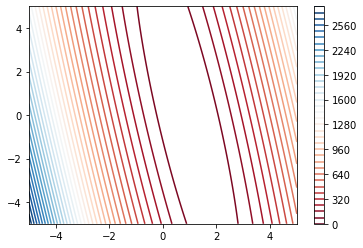

In [65]:
show_2d_function(f)

In [ ]:
print(df(0,0))

[-108, -20]


Choix du pas

In [82]:
eta = 0.01

Algorithme

In [83]:
# Initialisation
Xi=[[-4,4]]
fi=[f(Xi[0][0],Xi[0][1])]
X=Xi[0]
# Récurrence
for i in range(100):
 gradX=df(X[0],X[1])
 nx= [X[0]-eta*gradX[0],X[1]-eta*gradX[1]] #Point suivant
 Xi.append(nx) #Ajout dans la liste (xi,yi)
 fi.append(f(nx[0],nx[1]))
 X=nx # Point courant = point suivant
print(X)

[0.7847813105943408, 0.6878253154983992]


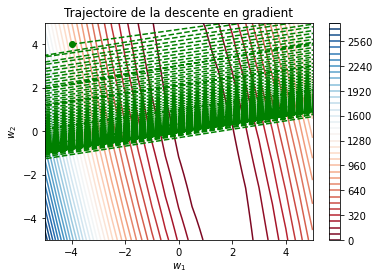

In [81]:
show_2d_trajectory(Xi,f)

Solution

In [ ]:
print([X[0]-eta*gradX[0],X[1]-eta*gradX[1]])

[93058218171.7436, 17623686095.000557]


Représentation graphique de l'algorithme

<function matplotlib.pyplot.show>

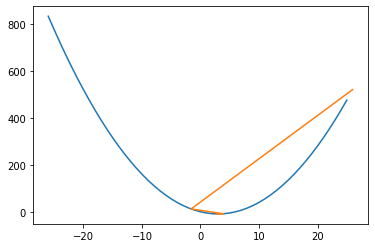

In [ ]:
xxx= range(-round(x0),round(x0))
plt.plot(xxx,[f(xi) for xi in xxx]) # Représentation de la fonction sur [-x0,x0]
plt.plot(xi,yi) # Représentation des segments (x_i,y_i)--(x_(i+1),y_(i+1))
plt.show

In [ ]:
print(x0,0.5*(2*x0-4),x0-0.5*(2*x0-4))

29 27.0 2.0
